In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
data_path = '/Users/caribbeanbluetin/Desktop/Research/MRA_LeadLag/data/pvCLCL_20000103_20201231.csv'
df_pvCLCL = pd.read_csv(data_path, index_col=0)

In [12]:
df_pvCLCL.index.get_loc('SPY')

567

In [4]:
trading_dates = pd.read_csv('../data/pvCLCL_clean_winsorized.csv',index_col=0).columns

In [5]:
import datetime as dt
d = trading_dates[0]

In [9]:
trading_dates = [date[1:] for date in trading_dates]

In [11]:
trading_dates

['20000103',
 '20000104',
 '20000105',
 '20000106',
 '20000107',
 '20000110',
 '20000111',
 '20000112',
 '20000113',
 '20000114',
 '20000118',
 '20000119',
 '20000120',
 '20000121',
 '20000124',
 '20000125',
 '20000126',
 '20000127',
 '20000128',
 '20000131',
 '20000202',
 '20000203',
 '20000208',
 '20000209',
 '20000211',
 '20000214',
 '20000215',
 '20000216',
 '20000218',
 '20000222',
 '20000223',
 '20000224',
 '20000225',
 '20000229',
 '20000301',
 '20000303',
 '20000306',
 '20000307',
 '20000309',
 '20000313',
 '20000314',
 '20000315',
 '20000316',
 '20000317',
 '20000322',
 '20000323',
 '20000324',
 '20000328',
 '20000329',
 '20000330',
 '20000331',
 '20000403',
 '20000404',
 '20000405',
 '20000406',
 '20000407',
 '20000410',
 '20000412',
 '20000413',
 '20000414',
 '20000417',
 '20000418',
 '20000419',
 '20000420',
 '20000425',
 '20000426',
 '20000428',
 '20000501',
 '20000502',
 '20000503',
 '20000508',
 '20000510',
 '20000511',
 '20000512',
 '20000515',
 '20000516',
 '20000517',

In [26]:
n_null = df_pvCLCL.isna().sum().sum()
print('total number of null values: ', n_null)
print(f'proportion of null values: {n_null/df_pvCLCL.size:.3g}' )

total number of null values:  15
proportion of null values: 4.09e-06


In [27]:
for ticker, row in df_pvCLCL.iterrows():
    for date in df_pvCLCL.columns:
        if pd.isnull(row[date]):
            print(f"Null value at ticker {ticker} and date {date}")

Null value at ticker AA and date X20161101
Null value at ticker BF and date X20000607
Null value at ticker CP and date X20011003
Null value at ticker EWU and date X20140929
Null value at ticker FAF and date X20100602
Null value at ticker GCI and date X20150629
Null value at ticker IGT and date X20150407
Null value at ticker IQI and date X20100601
Null value at ticker KGC and date X20030203
Null value at ticker KMX and date X20021001
Null value at ticker NX and date X20080424
Null value at ticker OIA and date X20100601
Null value at ticker PHG and date X20000801
Null value at ticker PNR and date X20121001
Null value at ticker TSM and date X20000602


In [28]:
df_pvCLCL.fillna(0,inplace=True)

In [29]:
df_pvCLCL[df_pvCLCL.eq(0).mean(axis=1)>0.5].index

Index([], dtype='object', name='ticker')

In [30]:
df_pvCLCL.loc[:,df_pvCLCL.eq(0).mean(axis=0)>0.1].columns

Index(['X20000201', 'X20000204', 'X20000207', 'X20000210', 'X20000217',
       'X20000228', 'X20000302', 'X20000308', 'X20000310', 'X20000320',
       'X20000321', 'X20000327', 'X20000411', 'X20000424', 'X20000427',
       'X20000504', 'X20000505', 'X20000509', 'X20000518', 'X20000524',
       'X20000525', 'X20000526', 'X20000608', 'X20000609', 'X20000615',
       'X20000619', 'X20000621', 'X20000622', 'X20000623', 'X20000710',
       'X20000714', 'X20000719', 'X20000720', 'X20000721', 'X20000724',
       'X20000725', 'X20000727', 'X20000801', 'X20000804', 'X20000807',
       'X20000808', 'X20000809', 'X20000810', 'X20000814', 'X20000815',
       'X20000817', 'X20000818', 'X20000822', 'X20000824', 'X20000825',
       'X20000828', 'X20000829', 'X20000830', 'X20000831', 'X20000901',
       'X20000905', 'X20000906', 'X20000907', 'X20000911', 'X20000912',
       'X20000913', 'X20000919', 'X20000920', 'X20000921', 'X20001004',
       'X20001005', 'X20001010', 'X20001027', 'X20001103', 'X200

In [31]:
len(df_pvCLCL.loc[:,df_pvCLCL.eq(0).mean(axis=0)>0.1].columns)

74

In [32]:
proportion = (df_pvCLCL>1).mean()
proportion[proportion>0.1].index

Index([], dtype='object')

No ticker has more than 50% of zero returns, 74 dates has more than 10% of zero returns, no dates has more than 10% of returns higher than 100%.

Now we remove the  74 dates.

In [33]:
df_pvCLCL = df_pvCLCL.loc[:,df_pvCLCL.eq(0).mean(axis=0)<=0.1]

In [34]:
np.percentile(df_pvCLCL,[1,2,3,97,98,99])

array([-0.06574   , -0.049541  , -0.04134678,  0.042943  ,  0.05192652,
        0.07011926])

In [35]:
(np.sum(abs(df_pvCLCL)>0.15).sum())/df_pvCLCL.size

0.0020992543141279485

In [36]:
df_pvCLCL[df_pvCLCL >= 0.15] = 0.15
df_pvCLCL[df_pvCLCL <= -0.15] = -0.15

In [40]:
df_pvCLCL.to_csv('../data/pvCLCL_clean_winsorized.csv')

In [1]:
df_pvCLCL.shape

NameError: name 'df_pvCLCL' is not defined

In [68]:
df_pvCLCL.iloc[603,]

'TIF'

In [69]:
x = np.arange(9).reshape(3,3)

In [71]:
x[x>5] =0

In [73]:
x

array([[0, 1, 2],
       [3, 4, 5],
       [0, 0, 0]])

In [72]:
list(range(5,5156,10))[-1]

5155

In [80]:
df_pvCLCL.loc[['SPY','TIF']].plot()


<AxesSubplot:xlabel='ticker'>

Error in callback <function flush_figures at 0x1286f3280> (for post_execute):


KeyboardInterrupt: 

In [6]:
df_pvCLCL.shape

(695, 5205)

In [77]:
df_pvCLCL.index[603]

'TIF'

In [10]:
df_pvCLCL_excess = df_pvCLCL - df_pvCLCL.loc['SPY']
df_pvCLCL_excess.drop('SPY',inplace=True)

In [12]:
df_pvCLCL_excess.to_csv('../../data/pvCLCL_excess_clean.csv')

Column number of the first day of every year

In [2]:
df_pvCLCL = pd.read_csv('../data/pvCLCL_clean_winsorized.csv', index_col=0)

In [4]:
df_pvCLCL.columns = pd.to_datetime(df_pvCLCL.columns.str[1:], format='%Y%m%d')

In [7]:
start = 5; end = 5146
retrain_period = 10
signal_length = 50
file_name = f'start{start}end{end}_length{signal_length}_trade{retrain_period}'
prediction_folder = 'full_non-negative_affinity'
with open(f'../results/real/{prediction_folder}/PnL_real_single_weighted/' + file_name + '.pkl',
          'rb') as f:
    PnL_SR = pickle.load(f)

In [9]:
first_day_cols = []
for col_number, index_value in enumerate(df_pvCLCL.columns):
    if index_value.year != df_pvCLCL.columns[col_number - 1].year:
        first_day_cols.append(col_number)
df_first_day = pd.DataFrame({'first day index': first_day_cols}, index=np.unique(df_pvCLCL.columns.year)).T

In [12]:
def annualized_sharpe_ratio(returns):
    return np.mean(returns) / np.std(returns) * np.sqrt(252)

In [11]:
PnL_SR['het'].keys()

dict_keys(['PnL', 'annualized SR'])

In [27]:
index = list(df_first_day.loc['first day index'])+[df_pvCLCL.shape[1]]
index

[0,
 178,
 425,
 677,
 929,
 1180,
 1432,
 1683,
 1933,
 2186,
 2438,
 2690,
 2942,
 3191,
 3443,
 3695,
 3947,
 4199,
 4450,
 4700,
 4952,
 5205]

In [32]:
PnL_SR['het']['PnL']

{'raw returns': array([ 0.00176282, -0.00236881, -0.0027757 , ..., -0.00396384,
        -0.00147627,  0.00451807]),
 'mkt excess returns': array([-4.57117678e-03,  1.55219237e-03, -3.02016967e-02, ...,
        -2.05584091e-03, -4.92727273e-05, -5.62931818e-04]),
 'leader excess returns': array([-0.00517543,  0.00021888, -0.0041865 , ...,  0.00370148,
         0.00790185,  0.0005171 ]),
 'leader raw returns': array([ 0.00693826, -0.00258769,  0.0014108 , ..., -0.00766532,
        -0.00937812,  0.00400097]),
 'leader mkt excess returns': array([ 0.00060426,  0.00133331, -0.0260152 , ..., -0.00575732,
        -0.00795112, -0.00108003])}

In [42]:

def SR_by_year():
    SR_by_year_dict = {}
    for model, PnL in PnL_SR.items():
        returns_full = PnL['PnL']['mkt excess returns']
        SR_list = []
        print(annualized_sharpe_ratio(returns_full[~np.isnan(returns_full)]))
        for i in range(len(index)-1):
            returns = returns_full[index[i]:index[i+1]]
            SR_list.append((annualized_sharpe_ratio(returns[~np.isnan(returns)])))
        SR_by_year_dict[model] = SR_list

    return SR_by_year_dict

SR_by_year_dict = SR_by_year()


0.9021206178601349
1.0259826147098023
1.180765760043514
0.7535219330216459


In [40]:
df_SR_by_year = pd.DataFrame(SR_by_year_dict,index=df_first_day.columns)
df_SR_by_year=df_SR_by_year.round(3)

In [41]:
df_SR_by_year.to_csv(f'../results/real/{prediction_folder}/PnL_real_single_weighted/SR_by_year.csv')

In [54]:
pd.DataFrame({'first day index':first_day_cols}, index=np.unique(df_pvCLCL.columns.year)).T

2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
first day index     0   178   425   677   929  1180  1432  1683  1933  2186   

                 ...  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
first day index  ...  2690  2942  3191  3443  3695  3947  4199  4450  4700   

                 2020  
first day index  4952  

[1 rows x 21 columns]

In [71]:

# Calculate rolling mean with window size of 50
rolling_mean = df_pvCLCL.iloc[:,:500].rolling(window=50, min_periods=50, axis=1).mean().dropna(axis=1)

# Calculate rolling standard deviation with window size of 50
rolling_std = df_pvCLCL.iloc[:,:500].rolling(window=50, min_periods=50, axis=1).std().dropna(axis=1)

# Organize the results in a new DataFrame
result_df = pd.concat([rolling_mean, rolling_std], axis=1, keys=['Rolling Mean', 'Rolling Std'])


(array([106., 126., 232., 112.,  54.,  32.,  18.,   7.,   2.,   6.]),
 array([0.00554255, 0.01248578, 0.01942901, 0.02637224, 0.03331547,
        0.0402587 , 0.04720193, 0.05414516, 0.06108839, 0.06803162,
        0.07497485]),
 <BarContainer object of 10 artists>)

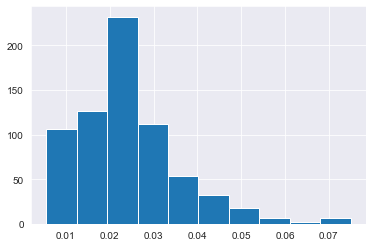

In [79]:
plt.hist(rolling_std.mean(axis=1))  # distribution of std of different stocks

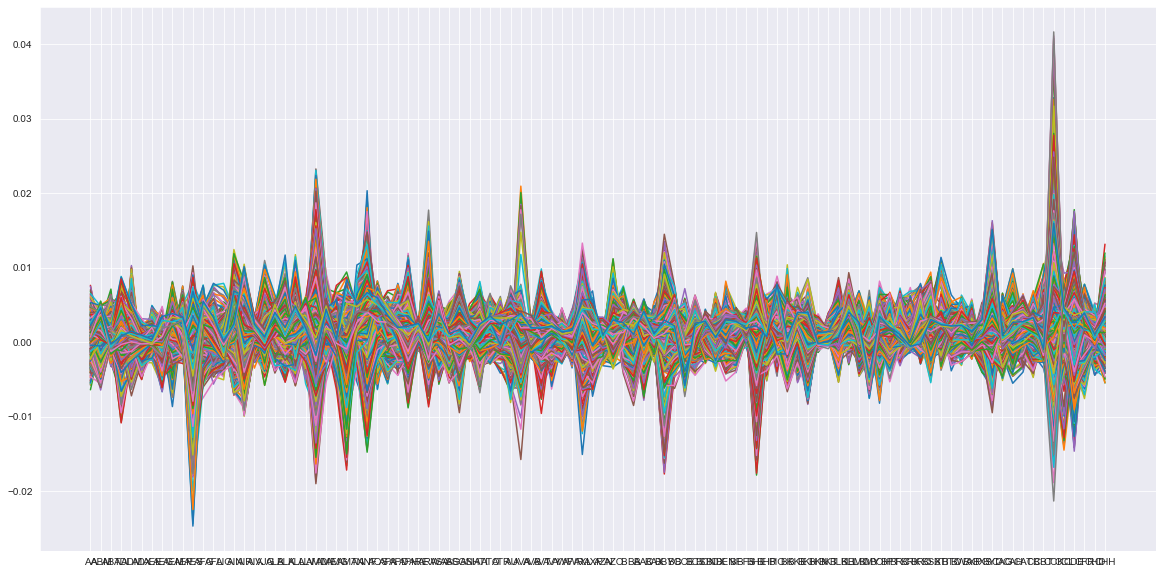

In [75]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(rolling_mean.iloc[:100]);

In [105]:
def normalize_by_column(data):

    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data-mean)/std

In [107]:
norm = normalize_by_column(np.array(df.T))


In [ ]:
stock_df = pd.read_csv("pvCLCL_20000103_20201231.csv")
stock_df = stock_df.dropna()
stock_df.set_index('ticker',inplace=True)
cols_name = map( str, list(stock_df))
cols_name = list(map( lambda x: x.replace('X', ''), cols_name))
stock_df.columns = cols_name
n,T = stock_df.shape
zero_cols_num = stock_df.isin([0]).sum(axis=0)
drop_cols = list(zero_cols_num[zero_cols_num>(n/10)].keys())
stock_df = stock_df.drop(drop_cols, axis=1)
zero_rows_num = stock_df.isin([0]).sum(axis=1)
drop_rows = list(zero_rows_num[zero_rows_num>(T/2)].keys())
stock_df = stock_df.drop(drop_rows, axis=0)
extreme_rows_num = (stock_df>= 1).sum(axis=1)
drop_rows = list(extreme_rows_num[extreme_rows_num>(T/10)].keys())
stock_df = stock_df.drop(drop_rows, axis=0)
stock_df = stock_df.sub(list(stock_df.loc["SPY",:]), axis='columns')
stock_df = stock_df.drop(["SPY"])
stock_df[stock_df >= 0.15] = 0.15
stock_df[stock_df <= -0.15] = -0.15
stock_df

In [42]:
['signal_estimates', 'lag_matrices', 'PnL','lag_vectors']*[True,False,True,True]

TypeError: can't multiply sequence by non-int of type 'list'

In [49]:
import scipy.io as spio
d = {'K1': [1,0,0,1],
     'K2': [1,0,2]}
spio.savemat('../results/test.mat',d)

In [50]:
test = spio.loadmat('../results/test.mat')

In [51]:
test

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Jul  3 14:35:15 2023',
 '__version__': '1.0',
 '__globals__': [],
 'K1': array([[1, 0, 0, 1]]),
 'K2': array([[1, 0, 2]])}

In [52]:
import pickle
with open('/Users/caribbeanbluetin/Desktop/Research/MRA_LeadLag/results/real/2023-07-02-23h37min_test/classes/start5end55.pkl', 'rb') as f:
        classes_spc_dict = pickle.load(f)

In [55]:
classes_spc_dict['K=1'].shape

(695,)

In [63]:
from itertools import repeat
list(zip([1,2,3],repeat('a')))

[(1, 'a'), (2, 'a'), (3, 'a')]

In [12]:
x = np.arange(-3,6).reshape(3,3)

In [13]:
x

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [15]:
np.sum(x<0)

3